In [198]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from sklearn.metrics import confusion_matrix
import seaborn as sns

Google drive mount

In [199]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Loading, Exploring data

In [200]:
images = np.load('/content/drive/My Drive/Signs data/X.npy')

In [201]:
testImgs =  np.load('/content/drive/My Drive/Signs data/Y.npy')

In [202]:
images.dtype

dtype('float32')

In [203]:
images.shape

(2062, 64, 64)

In [204]:
images = images.reshape(-1,64,64,1)
print(images.shape)

(2062, 64, 64, 1)


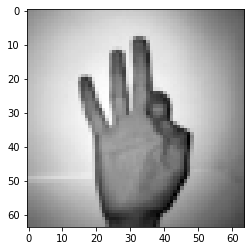

In [205]:
plt.imshow(images[1][:,:,0],cmap='gray')

In [206]:
testImgs.dtype

dtype('float64')

In [207]:
testImgs.shape

(2062, 10)

In [208]:
testImgs[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Image **augmentation** generator

In [209]:
datagen = ImageDataGenerator(
    featurewise_center=False,   # set input mean to 0 over the dataset
    samplewise_center=False,    # set each sample mean to 0

    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std

    zca_whitening=False         # dimension reduction

)

Data classification

In [210]:
X_classification = np.concatenate((images[204:409,:],
                                   images[822:1028,:],
                                   images[1649:1855,:],
                                   images[1443:1649,:],
                                   images[1236:1443,:],
                                   images[1855:2062,:],
                                   images[615:822,:],
                                   images[409:615,:],
                                   images[1028:1236,:],
                                   images[0:204,:]),axis = 0)

Split Dataset

In [211]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_classification,testImgs,test_size=0.1,random_state=42)

print("x_train shape : ", x_train.shape)
print("x_test shape : ", x_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

x_train shape :  (1855, 64, 64, 1)
x_test shape :  (207, 64, 64, 1)
y_train shape :  (1855, 10)
y_test shape :  (207, 10)


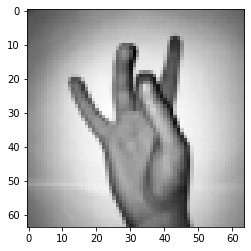

In [212]:
plt.imshow(x_train[2][:,:,0], cmap = "gray")


In [213]:
datagen.fit(x_train)

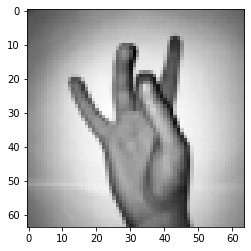

In [214]:
plt.imshow(x_train[2][:,:,0], cmap = "gray")

Model creation

In [215]:
def createModel():
  model = Sequential()

  model.add(Conv2D(32, (3,3) , padding = 'Same' ,activation='relu' , input_shape=(64,64,1)))
  model.add(Conv2D(32, (3,3) ,activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3,3) , padding = 'Same' ,activation='relu'))
  model.add(Conv2D(64, (3,3) ,activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))  

  model.add(Conv2D(64, (3,3) , padding = 'Same' ,activation='relu'))
  model.add(Conv2D(64, (3,3) ,activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))  

  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10,activation='softmax'))

  return model

In [216]:
model = createModel()

In [217]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 conv2d_43 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_44 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 conv2d_45 (Conv2D)          (None, 29, 29, 64)        36928     
                                                      

In [218]:
batch_size = 256
epochs = 100

model.compile(optimizer='rmsprop', loss='categorical_crossentropy' , metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=batch_size , epochs=epochs , validation_data=(x_test,y_test))




Epoch 1/100
8/8 [==============================] - 2s 104ms/step - loss: 2.3317 - accuracy: 0.0900 - val_loss: 2.3053 - val_accuracy: 0.0821
Epoch 2/100
8/8 [==============================] - 1s 71ms/step - loss: 2.3030 - accuracy: 0.0889 - val_loss: 2.3051 - val_accuracy: 0.0725
Epoch 3/100
8/8 [==============================] - 1s 71ms/step - loss: 2.3024 - accuracy: 0.0976 - val_loss: 2.3155 - val_accuracy: 0.0725
Epoch 4/100
8/8 [==============================] - 1s 70ms/step - loss: 2.2971 - accuracy: 0.1369 - val_loss: 2.2120 - val_accuracy: 0.2271
Epoch 5/100
8/8 [==============================] - 1s 70ms/step - loss: 2.3636 - accuracy: 0.2496 - val_loss: 1.8617 - val_accuracy: 0.3043
Epoch 6/100
8/8 [==============================] - 1s 70ms/step - loss: 1.6734 - accuracy: 0.3790 - val_loss: 1.6583 - val_accuracy: 0.4734
Epoch 7/100
8/8 [==============================] - 1s 70ms/step - loss: 1.3881 - accuracy: 0.5084 - val_loss: 1.2179 - val_accuracy: 0.5266
Epoch 8/100
8/8 [==

In [219]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.1384 - accuracy: 0.9807


[0.13842742145061493, 0.9806763529777527]

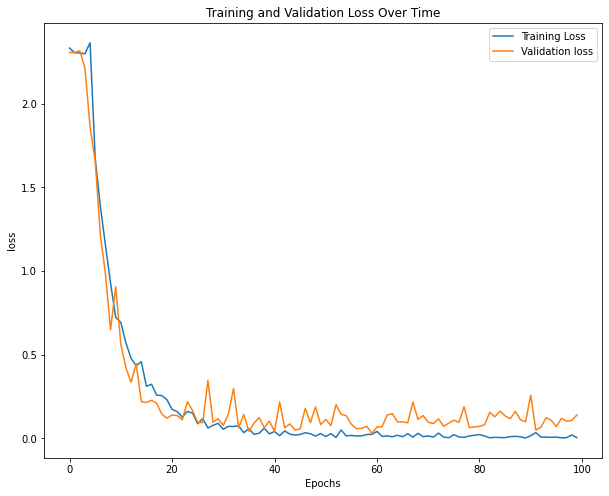

In [220]:
plt.figure(figsize = (10, 8))

epochs_range = range(len(history.history['loss']))

plt.plot(epochs_range, history.history['loss'], label = "Training Loss")
plt.plot(epochs_range, history.history['val_loss'], label = "Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.title("Training and Validation Loss Over Time")
plt.show()

7/7 [==============================] - 0s 4ms/step


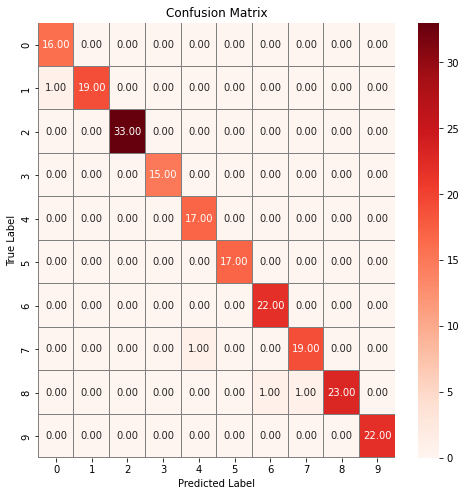

In [221]:
Y_pred = model.predict(x_test)

Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert Validation observation to one hot vectors
Y_true = np.argmax(y_test, axis = 1)

condision_mtrx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(condision_mtrx, annot = True, linewidths = 0.01, cmap = "Reds", linecolor = "gray", fmt = ".2f", ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

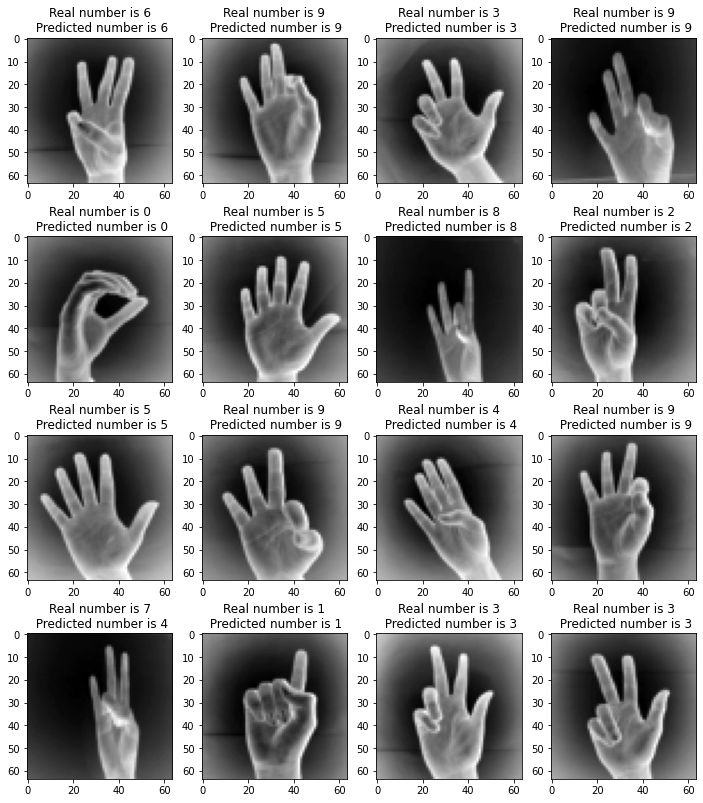

In [223]:
x_val_test =  x_test.reshape(x_test.shape[0], 64, 64)

fig , axis = plt.subplots(4, 4, figsize = (12, 14))

for i, ax in enumerate(axis.flat):
  ax.imshow(x_val_test[i],cmap='binary')
  ax.set(title = f"Real number is {y_test[i].argmax()}\n Predicted number is {Y_pred[i].argmax()}")